In [1]:
pwd

'C:\\Users\\user\\Desktop\\python_p\\220526'

# 3. 평가(Evaluation)

In [2]:
import pandas as pd
import numpy as np

# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

# 3.1 정확도(Accuracy)

### (1) 타이타닉 데이터 - 성별로만 생존, 사망 예측하는 DummyClassifier 만들어서 학습 및 예측 정확도 구해보기

In [3]:
titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.shape

(891, 12)

In [5]:
pred = np.zeros( (titanic_df.shape[0], 1) )

print(len(pred))
pred[:10]

891


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [6]:
import numpy as np
from sklearn.base import BaseEstimator

# 성별로만 생존, 사망을 예측하는 클래스
class MyDummyClassifier(BaseEstimator):
    # fit 메소드는 아무것도 학습하지 않음.
    def fit(self, X , y=None):
        pass
    
    # 데이터프레임(X)의 성별(Sex)이 여자면(0) 생존(1), 남자(1)면 사망(0)으로 하는 pred를 반환함.
    def predict(self, X):
        # pred는 성별을 기준으로 생존(1), 사망(0)을 예측하는 것
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

In [7]:
# 데이터 전처리 함수들
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 타이타닉 데이터 로드 및 feature(X), target(y) 데이터 분리
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)

# 데이터 전처리
X_titanic_df = transform_features(X_titanic_df)

# train, test 데이터 분리 
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

In [9]:
# MyDummyClassifier 객체 생성
myclf = MyDummyClassifier()

# MyDummyClassifier 학습
myclf.fit(X_train, y_train)

# 테스트 데이터 예측
mypredictions = myclf.predict(X_test)
print('MyDummyClassifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

MyDummyClassifier의 정확도는: 0.7877


### (2) mnist 예측 - 7이면 False, 다른 숫자는 True인 모델 만들어서 학습 및 예측 정확도 구해보기

In [10]:
from sklearn.datasets import load_digits  # mnist 데이터셋 로드
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [11]:
# 모든 데이터를 0으로 만드는 클래스
class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros( (len(X), 1) , dtype=bool)

In [12]:
# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [13]:
# mnist의 feature 데이터
print(digits.data.shape)
digits.data

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
# mnist의 target 데이터
print(digits.target.shape)
digits.target

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

In [15]:
# 7번이면 True이고 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target == 7).astype(int)
y

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [17]:
# InteractiveShell : print 안 써도 쉘의 모든 결과를 출력해주는 라이브러리
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

X_train.shape
y_train.shape

(1347,)

In [18]:
X_test.shape
y_test.shape

(450, 64)

(450,)

In [19]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape, '\n')

print('테스트 세트 레이블 0(7이 아닌 숫자)과 1(숫자 7)의 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트 크기 : (450,) 

테스트 세트 레이블 0(7이 아닌 숫자)과 1(숫자 7)의 분포도
0    405
1     45
dtype: int64


In [20]:
# MyFakeClassifier(모든 숫자 예측을 0으로 하는 모델)로 학습 및 예측
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)

# 정확도 평가
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

모든 예측을 0으로 하여도 정확도는:0.900


## 3.2 오차 행렬(Confusion Matrix)과 정밀도(precision), 재현율(recall) 소개

## 오차 행렬(Confusion matrix)

In [21]:
from sklearn.metrics import confusion_matrix

# 예측 결과 fakepred와 실제 결과 y_test의 Confusion Matrix출력
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

## 정밀도(Precision)와 재현율(Recall)

### MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정

In [22]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

print("정밀도:", precision_score(y_test, fakepred))
print("재현율:", recall_score(y_test, fakepred))

정밀도: 0.0
재현율: 0.0


### 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성

In [23]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

# confusion matrix, accuracy, precision, recall을 한꺼번에 계산하는 함수
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall), '\n')

### 타이타닉 데이터에 로지스틱 회귀 모델로 이진 분류한 후에 오차행렬, 정확도, 정밀도, 재현율 구해보기

In [24]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 타이타닉 데이터 로드
titanic_df = pd.read_csv('./titanic_train.csv')

# feature(X), target(y) 데이터 분리
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)

# 데이터 전처리
X_titanic_df = transform_features(X_titanic_df)

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

In [25]:
# 로지스틱 회귀(분류 모델) 모델 정의
lr_clf = LogisticRegression()
lr_clf

LogisticRegression()

In [26]:
# 학습
lr_clf.fit(X_train , y_train)

# 예측
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

LogisticRegression()

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869 



# 3.3 정밀도와 재현율의 (trade-off) 관계

### predict_proba 함수 : 분류 결정 예측 확률을 반환하는 함수

In [27]:
# 테스트 데이터(타이타닉)의 분류 결정 예측 확률을 반환해준다.
pred_proba = lr_clf.predict_proba(X_test)

pred_proba.shape
pred_proba[:10]  # [Negatve(0)가 될 확률, Positive(1)가 될 확률]

(179, 2)

array([[0.46198378, 0.53801622],
       [0.87868809, 0.12131191],
       [0.87716382, 0.12283618],
       [0.88259851, 0.11740149],
       [0.85518452, 0.14481548],
       [0.88222359, 0.11777641],
       [0.88843462, 0.11156538],
       [0.20873313, 0.79126687],
       [0.78276339, 0.21723661],
       [0.36939623, 0.63060377]])

In [28]:
# 테스트 데이터 predict 결과
pred  = lr_clf.predict(X_test)
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

### 예측 확률(pred_proba)과 예측 결과값(pred)을 결합해서 비교해보자

In [29]:
# 예측 결과값은 1차원 이므로 2차원으로 reshape 한 후에 예측 확률과 oncatenate 함
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1, 1)],axis=1)

# 두개의 class 중에서 더 큰 확률을 클래스 값으로 예측
pred_proba_result[:10]

array([[0.46198378, 0.53801622, 1.        ],
       [0.87868809, 0.12131191, 0.        ],
       [0.87716382, 0.12283618, 0.        ],
       [0.88259851, 0.11740149, 0.        ],
       [0.85518452, 0.14481548, 0.        ],
       [0.88222359, 0.11777641, 0.        ],
       [0.88843462, 0.11156538, 0.        ],
       [0.20873313, 0.79126687, 1.        ],
       [0.78276339, 0.21723661, 0.        ],
       [0.36939623, 0.63060377, 1.        ]])

### Binarizer : 요소들이 기준값보다 큰지 작은지를 알려주는 함수

In [30]:
X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

In [31]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold를 1.1로 세팅.
binarizer = Binarizer(threshold=1.1)                     

# array X의 값들이 1.1보다 작거나 같으면 0, 크면 1을 반환한다.
binarizer.fit_transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

### 분류 임계값 0.5로 예측값 변환(Binarizer 이용)

In [32]:
from sklearn.preprocessing import Binarizer

# predict_proba 반환값의 두번째 컬럼, 즉 Positive 컬럼을 추출한 후
# (1차원 이므로 2차원으로 reshape으로 해준다.)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
pred_proba_1

array([[0.53801622],
       [0.12131191],
       [0.12283618],
       [0.11740149],
       [0.14481548],
       [0.11777641],
       [0.11156538],
       [0.79126687],
       [0.21723661],
       [0.63060377],
       [0.10020379],
       [0.12501311],
       [0.12284216],
       [0.11161128],
       [0.56339168],
       [0.14101523],
       [0.09628966],
       [0.2666735 ],
       [0.27529801],
       [0.82834123],
       [0.24648357],
       [0.3809899 ],
       [0.14537925],
       [0.1853311 ],
       [0.1119819 ],
       [0.23456977],
       [0.14036105],
       [0.0741491 ],
       [0.28050917],
       [0.30457692],
       [0.94724994],
       [0.81725306],
       [0.12693571],
       [0.82618225],
       [0.39956647],
       [0.23456977],
       [0.07238847],
       [0.61101515],
       [0.05293842],
       [0.10390176],
       [0.3510178 ],
       [0.08336224],
       [0.82171925],
       [0.70784855],
       [0.63041221],
       [0.6304285 ],
       [0.91884844],
       [0.358

In [33]:
# Binarizer를 적용 - threshold는 0.5로 세팅(0.5 : 분류 결정 임계값)
custom_threshold = 0.5
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
binarizer

Binarizer(threshold=0.5)

In [34]:
# Positive 컬럼에 Binarizer를 적용하면 1 or 0을 예측한다.
custom_predict = binarizer.transform(pred_proba_1)

# 예측 결과와 실제 값 간의 오차행렬을 구해보면
get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869 



### 이번에는 분류 임계값을 0.4로 낮춰서 예측값을 보면 재현율이 높아지는지 확인해보자

In [35]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤  
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361 



### 분류 임곗값을 증가시키면서 예측값 변환(Binarizer 이용)

In [36]:
# 임곗값(threshold)을 점차 높여보면 재현율이 감소할까?
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # 임계값을 차례로 돌면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        
        # 임계값에 따른 결과들이 출력된다.
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361 

임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033 

임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869 

임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541 

임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377 



## precision_recall_curve( ) 를 이용하여 임곗값에 따른 정밀도-재현율 값 추출

In [37]:
# 예측값 Positive(1)일 확률 
lr_clf.predict_proba(X_test)[:, 1]

array([0.53801622, 0.12131191, 0.12283618, 0.11740149, 0.14481548,
       0.11777641, 0.11156538, 0.79126687, 0.21723661, 0.63060377,
       0.10020379, 0.12501311, 0.12284216, 0.11161128, 0.56339168,
       0.14101523, 0.09628966, 0.2666735 , 0.27529801, 0.82834123,
       0.24648357, 0.3809899 , 0.14537925, 0.1853311 , 0.1119819 ,
       0.23456977, 0.14036105, 0.0741491 , 0.28050917, 0.30457692,
       0.94724994, 0.81725306, 0.12693571, 0.82618225, 0.39956647,
       0.23456977, 0.07238847, 0.61101515, 0.05293842, 0.10390176,
       0.3510178 , 0.08336224, 0.82171925, 0.70784855, 0.63041221,
       0.6304285 , 0.91884844, 0.35866053, 0.94890218, 0.11201643,
       0.59272444, 0.11161128, 0.13278504, 0.72547296, 0.30945248,
       0.19696915, 0.2263032 , 0.12283722, 0.15420496, 0.43258243,
       0.28021729, 0.1007653 , 0.54546837, 0.51440183, 0.44428988,
       0.09458164, 0.66671859, 0.59401247, 0.95182084, 0.14821413,
       0.12890752, 0.16845409, 0.10390401, 0.9480032 , 0.19868

In [38]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 예측 확률들을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

print(pred_proba_class1.shape)
pred_proba_class1  

(179,)


array([0.53801622, 0.12131191, 0.12283618, 0.11740149, 0.14481548,
       0.11777641, 0.11156538, 0.79126687, 0.21723661, 0.63060377,
       0.10020379, 0.12501311, 0.12284216, 0.11161128, 0.56339168,
       0.14101523, 0.09628966, 0.2666735 , 0.27529801, 0.82834123,
       0.24648357, 0.3809899 , 0.14537925, 0.1853311 , 0.1119819 ,
       0.23456977, 0.14036105, 0.0741491 , 0.28050917, 0.30457692,
       0.94724994, 0.81725306, 0.12693571, 0.82618225, 0.39956647,
       0.23456977, 0.07238847, 0.61101515, 0.05293842, 0.10390176,
       0.3510178 , 0.08336224, 0.82171925, 0.70784855, 0.63041221,
       0.6304285 , 0.91884844, 0.35866053, 0.94890218, 0.11201643,
       0.59272444, 0.11161128, 0.13278504, 0.72547296, 0.30945248,
       0.19696915, 0.2263032 , 0.12283722, 0.15420496, 0.43258243,
       0.28021729, 0.1007653 , 0.54546837, 0.51440183, 0.44428988,
       0.09458164, 0.66671859, 0.59401247, 0.95182084, 0.14821413,
       0.12890752, 0.16845409, 0.10390401, 0.9480032 , 0.19868

In [39]:
# 실제값과 예측 확률(레이블 값이 1일 때)을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('분류 임곗값 Shape  :', thresholds.shape, '\n')

print('precisions Shape:', precisions.shape)
print('recalls Shape   :', recalls.shape)

분류 임곗값 Shape  : (143,) 

precisions Shape: (144,)
recalls Shape   : (144,)


In [40]:
print("thresholds 5 sample:", thresholds[:5], '\n')

print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:   ", recalls[:5])

thresholds 5 sample: [0.10390176 0.10390401 0.10392915 0.10788609 0.10887644] 

precisions 5 sample: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls 5 sample:    [1.         0.98360656 0.98360656 0.98360656 0.96721311]


In [41]:
np.arange(0, 143, 15)

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135])

In [42]:
# 반환된 임계값 배열 로우가 143건이므로 샘플로 10건만 추출하되, 임곗값을 15개씩 건너 뛰며 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('임계값 배열 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

임계값 배열 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]


In [43]:
# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2), '\n')

print('샘플 임계값 별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값 별 재현율: ', np.round(recalls[thr_index], 3))

샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95] 

샘플 임계값 별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값 별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


### 임곗값의 변경에 따른 정밀도-재현율 변화 곡선을 그림

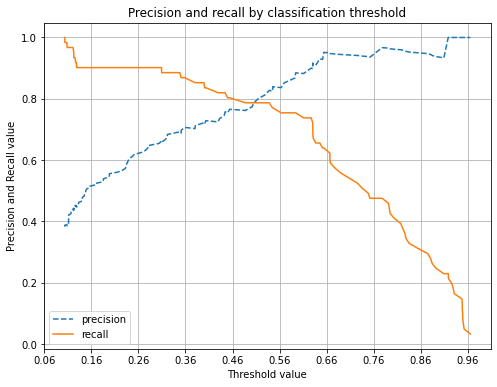

In [44]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# 정밀도, 재현율 변화 그래프 그리는 코드
def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    plt.title('Precision and recall by classification threshold')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

# 분류 임계값이 변화됨에 따라 정밀도(precision), 재현율(recall) 추이
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

# 3.4 F1 Score

In [45]:
from sklearn.metrics import f1_score 

# f1_score 클래스를 이용해서 f1 score 계산
f1 = f1_score(y_test, pred) # 실제값, 예측값
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [46]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1), '\n')

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)

# 분류 임계값 변경을 하면서 f1 score를 포함한 평가지표 확인
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1:0.7727 

임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1:0.7840 

임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805 

임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1:0.7931 

임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036 



# 3-5 ROC Curve와 AUC

In [47]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

print(len(pred_proba_class1))
pred_proba_class1[:20]

179


array([0.53801622, 0.12131191, 0.12283618, 0.11740149, 0.14481548,
       0.11777641, 0.11156538, 0.79126687, 0.21723661, 0.63060377,
       0.10020379, 0.12501311, 0.12284216, 0.11161128, 0.56339168,
       0.14101523, 0.09628966, 0.2666735 , 0.27529801, 0.82834123])

In [48]:
# fpr, tps, thresholds
fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)

print('분류 임곗값 Shape :', thresholds.shape, '\n')

분류 임곗값 Shape : (55,) 



In [49]:
# 반환된 임곗값 배열 로우가 55건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임곗값:  [1.97 0.75 0.63 0.59 0.49 0.4  0.35 0.23 0.13 0.12 0.11]


In [50]:
# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 임곗값별 FPR:  [0.    0.017 0.034 0.051 0.127 0.161 0.203 0.331 0.585 0.636 0.797]
샘플 임곗값별 TPR:  [0.    0.475 0.689 0.754 0.787 0.836 0.869 0.902 0.918 0.967 0.967]


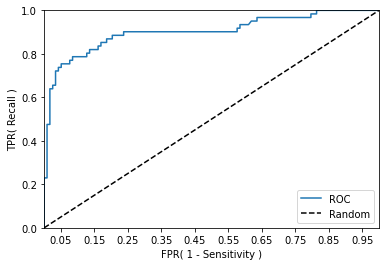

In [51]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    
    # 가운데 대각선 직선(random 값일 때)을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [52]:
from sklearn.metrics import roc_auc_score

### 아래는 roc_auc_score()의 인자를 잘못 입력한 것으로, 책에서 수정이 필요한 부분입니다. 
### 책에서는 roc_auc_score(y_test, pred)로 예측 타겟값을 입력하였으나 
### roc_auc_score(y_test, y_score)로 y_score는 predict_proba()로 호출된 예측 확률 ndarray중 Positive 열에 해당하는 ndarray입니다. 

# pred = lr_clf.predict(X_test)
# roc_score = roc_auc_score(y_test, pred)

# 수정된 내용
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9024


In [53]:
# ROC-AUC가 추가된 get_clf_eval 함수 
# : 모델의 평가지표들(오차 행렬, 정확도, 정밀도, 재현율, f1 score, ROC AUC)을 보여준다.
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc), '\n')
